# Pool of Financial Instruments


<Economic/Financial Theory backing the selection of pools>

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
tickers = [
    "TATAMOTORS.NS", "ONGC.NS", "M&M.NS", "MARUTI.NS", "BPCL.NS", "RELIANCE.NS",
    "HINDPETRO.NS", "HEROMOTOCO.NS", "ESCORTS.NS", "POWERGRID.NS", "BHARATFORG.NS",
    "TORNTPOWER.NS", "CESC.NS", "TVSMOTOR.NS", "NTPC.NS",
     "TATAPOWER.NS", "BOSCHLTD.NS", "GAIL.NS", "EXIDEIND.NS",
    "MRF.NS", "NHPC.NS", "SMLISUZU.NS", "APOLLOTYRE.NS", "PETRONET.NS", "IGL.NS",
    "CEATLTD.NS", "JSWENERGY.NS"
]

start_date = "2013-01-01"
end_date = "2022-12-31"

total_data = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    data.loc[:,'Ticker'] = ticker
    data = data.loc[:,['Open', 'Close', 'Volume', 'Ticker']]
    data.loc[:,'Returns'] = data.loc[:,'Close'].pct_change()
    total_data = pd.concat([total_data, data])

# total_data.to_csv("combined_stock_data.csv")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

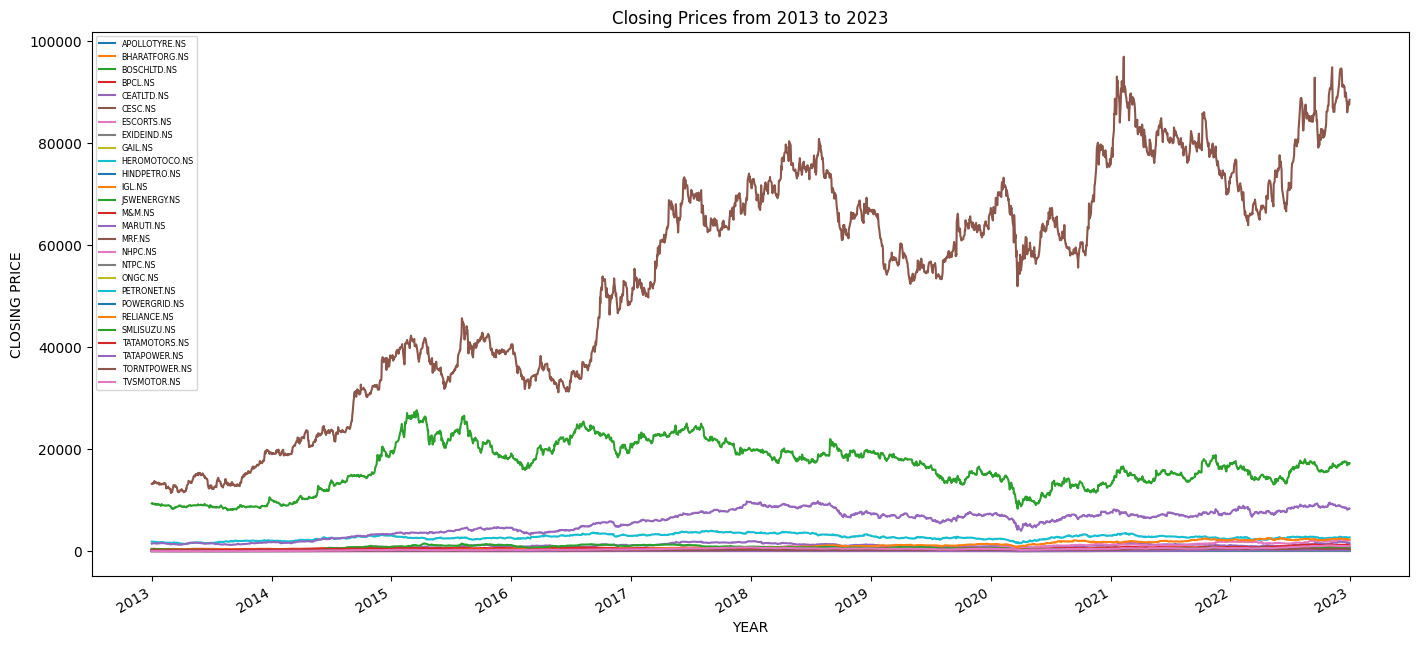

In [ ]:
closing_prices = total_data.pivot_table(index='Date', columns='Ticker', values='Close')

closing_prices.plot(figsize=(17,8))
plt.title('Closing Prices from 2013 to 2023')
plt.xlabel('YEAR')
plt.ylabel('CLOSING PRICE')
plt.legend(fontsize='xx-small')
plt.show()

<Figure size 640x480 with 0 Axes>

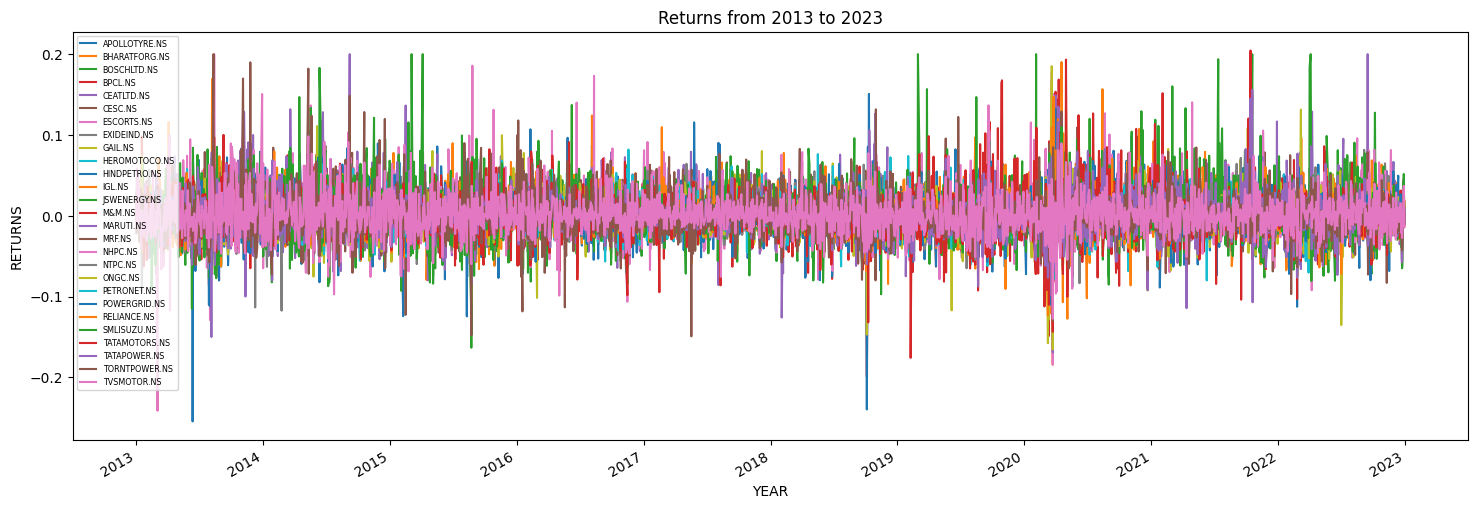

In [ ]:
returns = closing_prices.pct_change().dropna()
returns.to_csv("returns.csv")
plt.figure()
returns.plot(figsize=(18,6))
# plt.plot(returns)
plt.title('Returns from 2013 to 2023')
plt.xlabel('YEAR')
plt.ylabel('RETURNS')
plt.legend(fontsize='xx-small')
plt.show()

# Quantitatively Selecting Pairs to Trade

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(returns)
returns_scaled = scaler.transform(returns)
returns_scaled

array([[ 3.73343234e-01,  1.11827497e+00,  4.75913373e-01, ...,
         2.13261412e-01, -9.06093741e-01, -6.27196616e-01],
       [-1.45556982e-01,  1.10705557e-01, -3.96996466e-01, ...,
        -7.47909642e-01, -1.12877791e-01,  6.52301086e-01],
       [-2.58100879e-01, -4.05310090e-01, -3.78111329e-01, ...,
        -3.16199754e-03, -4.88028236e-01,  2.46316229e+00],
       ...,
       [-2.52324434e-01, -6.36183048e-04,  1.87113084e-01, ...,
         9.31175468e-02,  2.17415570e-01,  1.53418311e+00],
       [ 5.63180864e-01,  1.67905303e-01, -6.46104025e-01, ...,
        -5.28796502e-01,  5.51272914e-02,  6.63355484e-01],
       [-3.06034386e-01,  4.59719641e-02,  5.30310845e-01, ...,
         3.71281830e-01, -3.93641255e-01, -6.81659007e-01]])

x= x-X.mean()/X.std()

In [ ]:
num_components = 10
columns=[f'PC{n+1}' for n in range(num_components)]
pca = PCA(num_components)
pca_result_scaled = pca.fit_transform(returns_scaled.T)
pca_df_scaled = pd.DataFrame(pca_result_scaled, columns=columns, index=returns.columns)

In [ ]:
pca_df_scaled

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Ticker,,,,,,,,,,
APOLLOTYRE.NS,-12.892219,-0.467236,14.077313,-1.063117,-14.701005,-3.646196,-7.917570,-0.947556,-6.248136,3.683167
BHARATFORG.NS,-10.402891,1.042804,-4.411875,-6.905522,-0.141109,-1.646868,-9.067608,-10.758527,-10.860168,1.205193
BOSCHLTD.NS,-11.948371,-1.295582,-8.127906,-1.793580,-4.418880,9.711196,5.071835,0.604311,-8.230013,0.041276
BPCL.NS,17.050225,26.733072,5.606609,-6.077320,1.894560,-4.682929,9.795294,-1.716906,-0.507885,3.704775
CEATLTD.NS,-9.888029,2.046721,26.679975,2.959248,-15.528346,-6.900511,1.351071,0.145219,0.878962,-10.560890
CESC.NS,6.051543,-6.340338,1.299895,-16.344343,4.689211,-2.859871,-2.486307,-0.352452,-2.233043,17.229200
ESCORTS.NS,-6.955627,1.270191,7.902497,1.413428,10.486202,3.130657,3.716679,8.598584,19.257166,8.848328
EXIDEIND.NS,-7.451157,-3.961636,1.616803,3.387051,2.951943,0.091504,-4.076128,7.135694,1.231938,20.597661
GAIL.NS,17.917232,2.960205,-3.693647,10.128225,-6.903070,13.340643,-8.417525,-3.512068,-5.673089,3.316481


Text(0.5, 1.0, 'PCA Scatter Plot with Annotations')

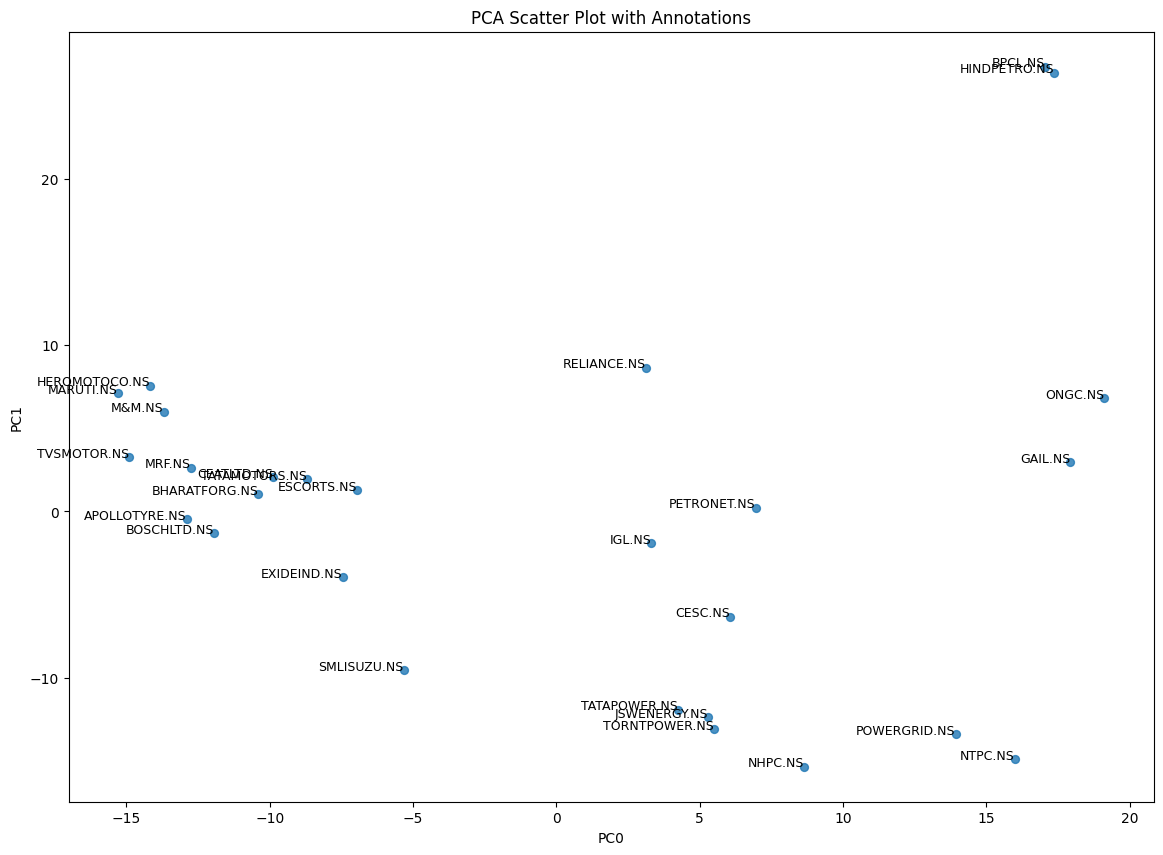

In [ ]:
pca_df_scaled.plot(kind='scatter', x='PC1', y='PC2', s=32, alpha=.8,figsize=(14,10))
for label, x, y in zip(pca_df_scaled.index, pca_df_scaled['PC1'], pca_df_scaled['PC2']):
    plt.text(x, y, label, fontsize=9, ha='right')
plt.gca().spines[['top', 'right',]].set_visible(True)
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('PCA Scatter Plot with Annotations')

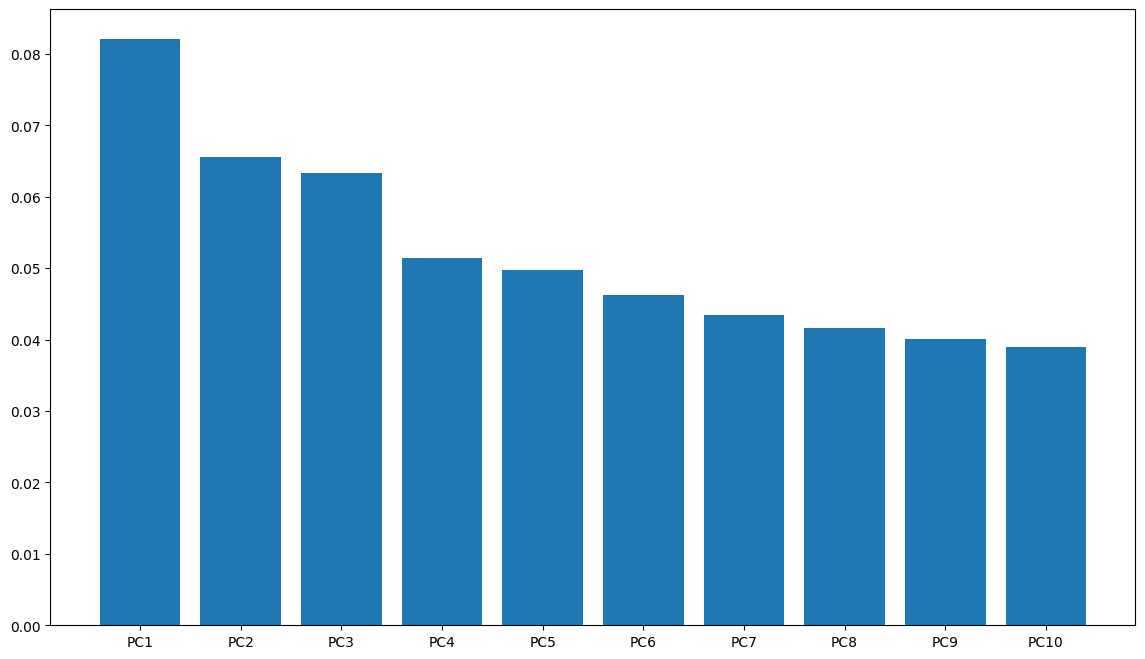

In [ ]:
fig,ax = plt.subplots(figsize=(14,8))

ax.bar(columns,pca.explained_variance_ratio_)
plt.show()

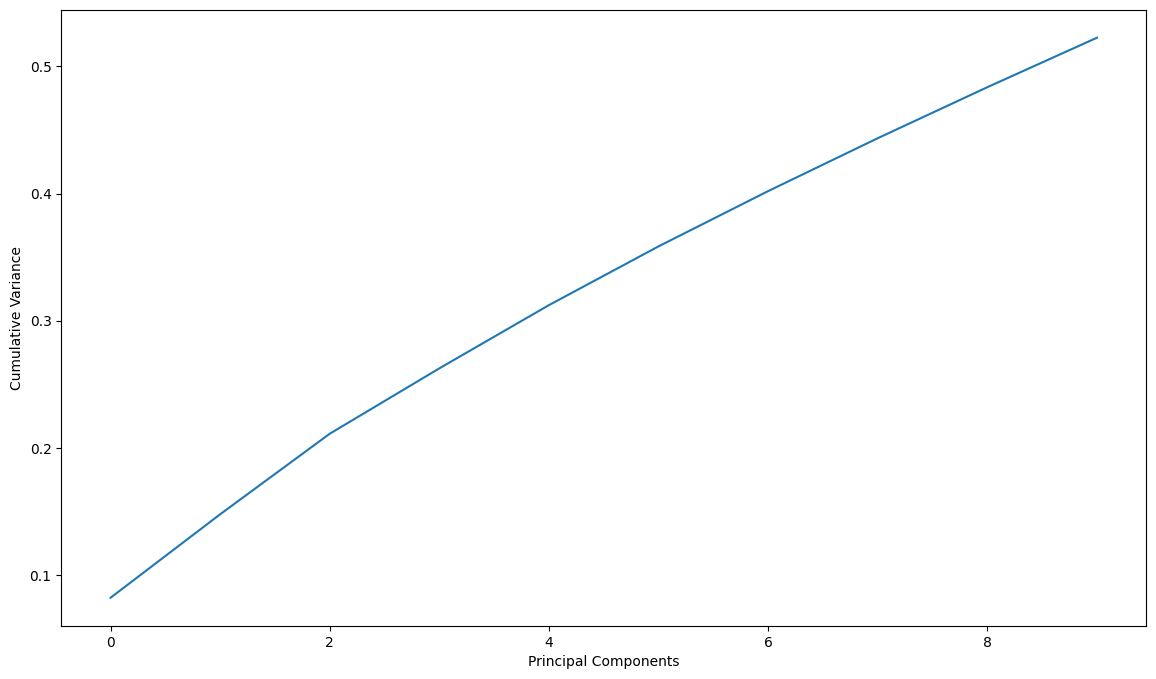

In [ ]:
cum_variance = [0]*len(columns)
cum_variance[0] = pca.explained_variance_ratio_[0]
for i in range(1,len(columns)):
  cum_variance[i] = cum_variance[i-1] + pca.explained_variance_ratio_[i]

fig,ax = plt.subplots(figsize=(14,8))

plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance')
ax.plot(cum_variance)
plt.show()

In [ ]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

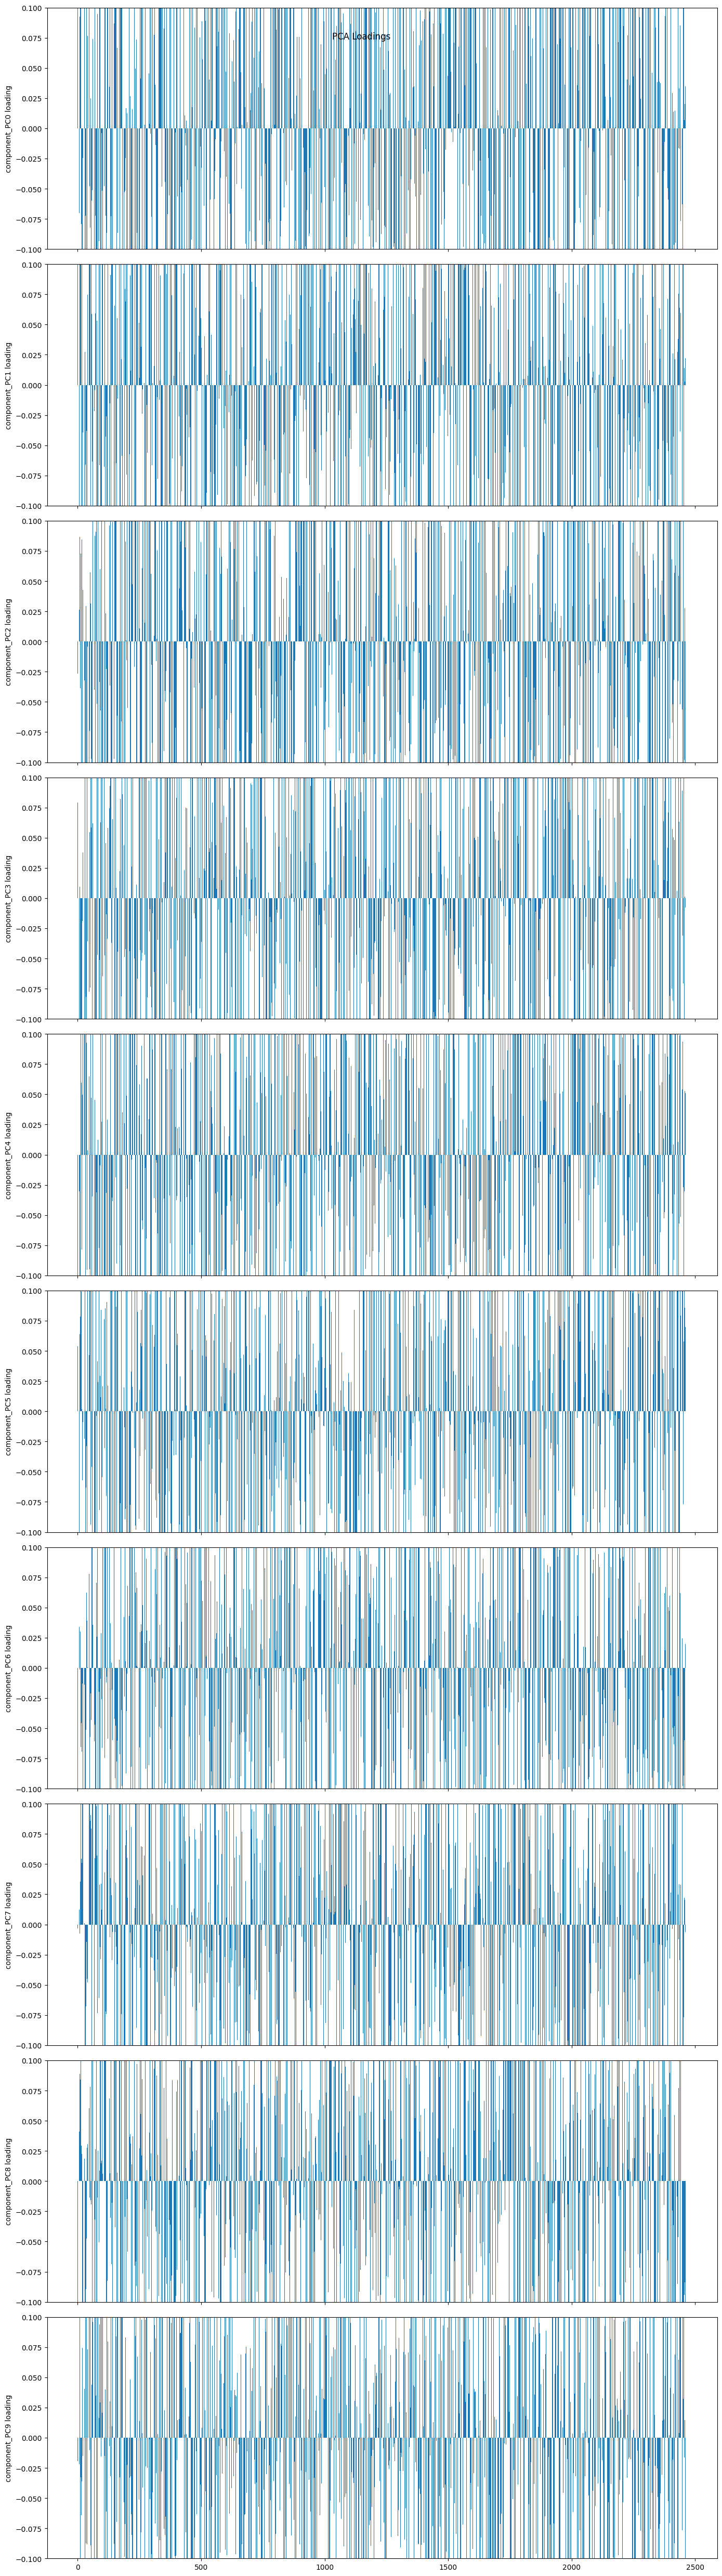

In [ ]:
components = [f'PC{x}' for x in range(num_components)]
fig, axes = plt.subplots(nrows=num_components,ncols=1,figsize=(14,50),sharex=True)

for i, ax in enumerate(axes):
    ax.bar(range(loadings.shape[0]), loadings[:,i])
    ax.set_ylabel(f'component_{components[i]} loading')
    ax.set_ylim([-0.1, 0.1])

plt.suptitle('PCA Loadings')
plt.tight_layout()
plt.show()

## OPTICS CLUSTERRING

In [ ]:
from sklearn.cluster import OPTICS
clusterring = OPTICS(min_samples=2,xi=0.05,min_cluster_size=2).fit(pca_df_scaled.iloc[:,0:6]) #to reduce correlation
clusterring.labels_

array([ 0,  2,  3,  8,  0,  5,  1,  1,  4,  2,  8,  7,  5,  3,  2,  0,  5,
        6,  4,  7,  6, -1, -1,  3,  5,  5, -1])

In [ ]:
labels = clusterring.labels_[clusterring.ordering_]
reachability = clusterring.reachability_[clusterring.ordering_]

In [ ]:
labels

array([ 0,  0,  0,  1,  1,  2,  2,  2,  3,  3,  3, -1, -1,  4,  4,  5,  5,
        5,  5,  5, -1,  6,  6,  7,  7,  8,  8])

In [ ]:
num_stocks = []
for i in range(max(clusterring.labels_)+1):
  num_stocks.append(pca_df_scaled[clusterring.labels_==i].shape[0])

num_stocks

[3, 2, 3, 3, 2, 5, 2, 2, 2]

In [ ]:
pca_df_scaled[clusterring.labels_==-1].shape[0]

3

Text(0.5, 1.0, 'Reachability Plot')

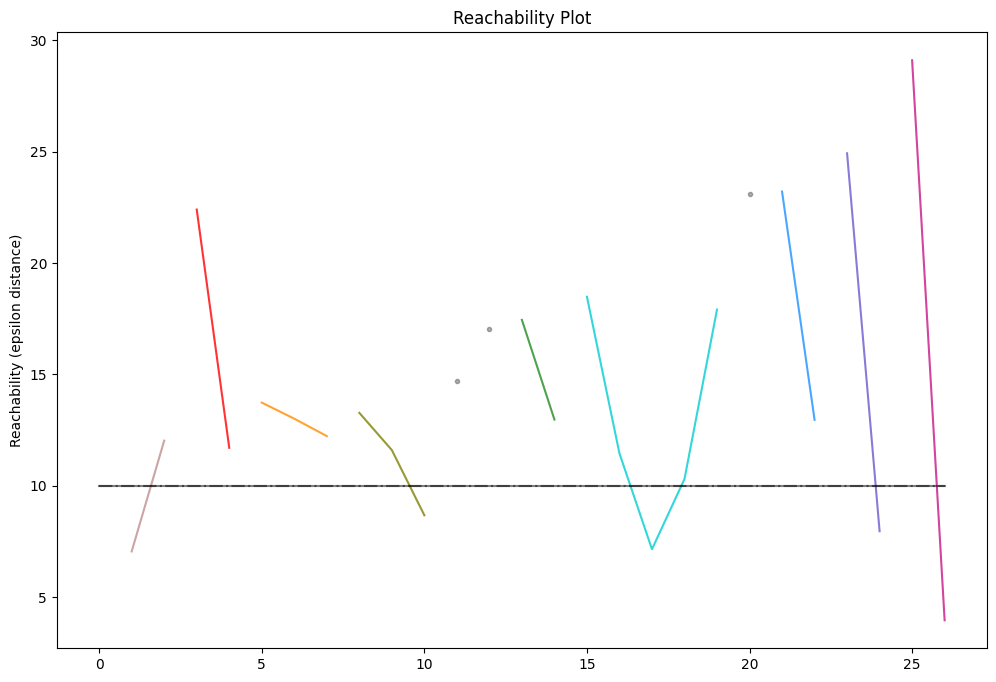

In [ ]:
space = np.arange(len(pca_df_scaled))
fig, ax = plt.subplots(figsize=(12,8))
colors = ["rosybrown","red","darkorange","olive","forestgreen","darkturquoise","dodgerblue","slateblue","mediumvioletred"]
for klass, color in enumerate(colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax.plot(Xk, Rk, color, alpha=0.8)
ax.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax.plot(space, np.full_like(space, 10, dtype=float), "k-", alpha=0.5)
ax.plot(space, np.full_like(space, 10, dtype=float), "k-.", alpha=0.5)
ax.set_ylabel("Reachability (epsilon distance)")
ax.set_title("Reachability Plot")

Text(0.5, 1.0, 'Automatic Clustering\nOPTICS')

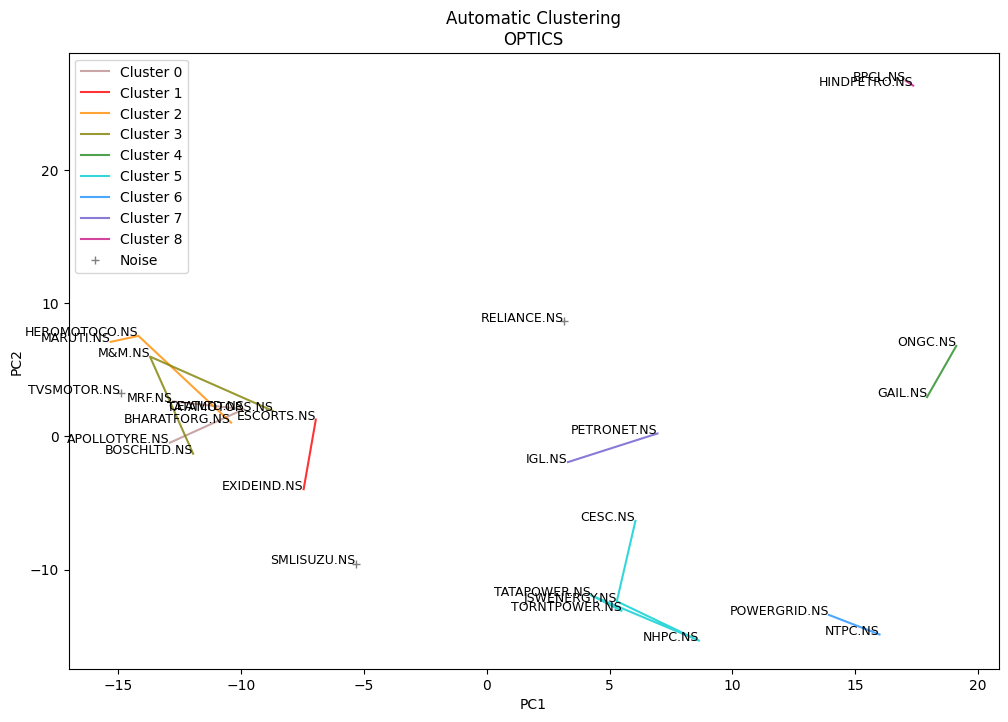

In [ ]:
from random import randint
fig, ax = plt.subplots(figsize=(12,8))
# for i in range(max(clusterring.labels_)):
#     colors.append('#%06X' % randint(0, 0xFFFFFF))

for klass, color in enumerate(colors):
    pck = pca_df_scaled[clusterring.labels_ == klass]
    ax.plot(pck.iloc[:, 0], pck.iloc[:, 1], color, alpha=0.8,label=f'Cluster {klass}')
    for index, row in pck.iterrows():
        ax.text(row.iloc[0], row.iloc[1], str(index), fontsize=9, ha='right')

ax.plot(pca_df_scaled[clusterring.labels_ == -1].iloc[:,0], pca_df_scaled[clusterring.labels_ == -1].iloc[:,1], "k+", alpha=0.5,label=f'Noise')
for index, row in pca_df_scaled[clusterring.labels_ == -1].iterrows():
  ax.text(row.iloc[0], row.iloc[1], str(index), fontsize=9, ha='right')
ax.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
ax.set_title("Automatic Clustering\nOPTICS")

In [ ]:
for i in range(max(clusterring.labels_)+1):
  print(f'Cluster {i}: {pca_df_scaled[clusterring.labels_==i]}')

Cluster 0:                      PC1       PC2        PC3       PC4        PC5       PC6  \
Ticker                                                                         
APOLLOTYRE.NS -12.892219 -0.467236  14.077313 -1.063117 -14.701005 -3.646196   
CEATLTD.NS     -9.888029  2.046721  26.679975  2.959248 -15.528346 -6.900511   
MRF.NS        -12.761381  2.629791  17.352390  1.747154 -10.195332 -2.525425   

                    PC7       PC8       PC9       PC10  
Ticker                                                  
APOLLOTYRE.NS -7.917570 -0.947556 -6.248136   3.683167  
CEATLTD.NS     1.351071  0.145219  0.878962 -10.560890  
MRF.NS        -5.090258  6.793130 -1.005862  -1.287638  
Cluster 1:                   PC1       PC2       PC3       PC4        PC5       PC6  \
Ticker                                                                     
ESCORTS.NS  -6.955627  1.270191  7.902497  1.413428  10.486202  3.130657   
EXIDEIND.NS -7.451157 -3.961636  1.616803  3.387051   2.951943  

## Exit Tests

In [ ]:
pairs = []

for i in range(max(clusterring.labels_)+1):
  for j in range(0,pca_df_scaled[clusterring.labels_==i].shape[0]-1,1):
    for k in range(j+1,pca_df_scaled[clusterring.labels_==i].shape[0],1):
      pairs.append([pca_df_scaled[clusterring.labels_==i].index[j],pca_df_scaled[clusterring.labels_==i].index[k]])
pairs


[['APOLLOTYRE.NS', 'CEATLTD.NS'],
 ['APOLLOTYRE.NS', 'MRF.NS'],
 ['CEATLTD.NS', 'MRF.NS'],
 ['ESCORTS.NS', 'EXIDEIND.NS'],
 ['BHARATFORG.NS', 'HEROMOTOCO.NS'],
 ['BHARATFORG.NS', 'MARUTI.NS'],
 ['HEROMOTOCO.NS', 'MARUTI.NS'],
 ['BOSCHLTD.NS', 'M&M.NS'],
 ['BOSCHLTD.NS', 'TATAMOTORS.NS'],
 ['M&M.NS', 'TATAMOTORS.NS'],
 ['GAIL.NS', 'ONGC.NS'],
 ['CESC.NS', 'JSWENERGY.NS'],
 ['CESC.NS', 'NHPC.NS'],
 ['CESC.NS', 'TATAPOWER.NS'],
 ['CESC.NS', 'TORNTPOWER.NS'],
 ['JSWENERGY.NS', 'NHPC.NS'],
 ['JSWENERGY.NS', 'TATAPOWER.NS'],
 ['JSWENERGY.NS', 'TORNTPOWER.NS'],
 ['NHPC.NS', 'TATAPOWER.NS'],
 ['NHPC.NS', 'TORNTPOWER.NS'],
 ['TATAPOWER.NS', 'TORNTPOWER.NS'],
 ['NTPC.NS', 'POWERGRID.NS'],
 ['IGL.NS', 'PETRONET.NS'],
 ['BPCL.NS', 'HINDPETRO.NS']]

In [ ]:
#!pip install arch

In [ ]:
closing_prices.columns

Index(['APOLLOTYRE.NS', 'BHARATFORG.NS', 'BOSCHLTD.NS', 'BPCL.NS',
       'CEATLTD.NS', 'CESC.NS', 'ESCORTS.NS', 'EXIDEIND.NS', 'GAIL.NS',
       'HEROMOTOCO.NS', 'HINDPETRO.NS', 'IGL.NS', 'JSWENERGY.NS', 'M&M.NS',
       'MARUTI.NS', 'MRF.NS', 'NHPC.NS', 'NTPC.NS', 'ONGC.NS', 'PETRONET.NS',
       'POWERGRID.NS', 'RELIANCE.NS', 'SMLISUZU.NS', 'TATAMOTORS.NS',
       'TATAPOWER.NS', 'TORNTPOWER.NS', 'TVSMOTOR.NS'],
      dtype='object', name='Ticker')

In [ ]:
closing_prices

Ticker,APOLLOTYRE.NS,BHARATFORG.NS,BOSCHLTD.NS,BPCL.NS,CEATLTD.NS,CESC.NS,ESCORTS.NS,EXIDEIND.NS,GAIL.NS,HEROMOTOCO.NS,...,NTPC.NS,ONGC.NS,PETRONET.NS,POWERGRID.NS,RELIANCE.NS,SMLISUZU.NS,TATAMOTORS.NS,TATAPOWER.NS,TORNTPOWER.NS,TVSMOTOR.NS
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,89.400002,128.449997,9387.799805,59.383331,107.050003,28.750233,73.650002,143.199997,67.012535,1897.349976,...,129.583328,178.433334,79.000000,64.040642,384.339752,448.899994,313.388580,107.502914,195.449997,42.599998
2013-01-02,90.300003,131.899994,9475.549805,61.075001,109.550003,28.790630,73.050003,142.300003,68.390656,1905.349976,...,131.250000,183.066666,80.250000,63.618767,387.654205,446.350006,314.625336,108.081924,191.250000,42.049999
2013-01-03,90.050003,132.375000,9409.000000,61.041664,111.050003,28.440512,73.199997,142.850006,68.128159,1887.949951,...,131.291672,186.533340,80.599998,64.209389,393.505951,445.049988,314.724274,106.296638,190.850006,42.750000
2013-01-04,89.550003,131.274994,9346.250000,62.333332,111.150002,28.229542,75.500000,142.350006,69.590660,1887.949951,...,132.416672,189.866669,81.574997,64.659393,394.008820,460.500000,312.052917,106.344894,188.699997,45.250000
2013-01-07,88.150002,131.199997,9329.099609,64.250000,111.599998,28.009596,75.449997,146.250000,68.690659,1897.300049,...,131.333328,192.000000,83.000000,64.350014,391.608704,470.149994,309.925751,104.993866,185.300003,47.349998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,320.350006,875.799988,17281.150391,162.550003,1600.900024,76.900002,2102.199951,180.699997,94.400002,2686.300049,...,165.649994,141.300003,209.850006,158.887497,2329.697266,638.849976,384.799988,203.149994,489.850006,1015.549988
2022-12-27,323.500000,872.799988,17221.550781,163.000000,1660.650024,77.050003,2086.800049,177.949997,95.000000,2702.350098,...,165.199997,144.800003,211.899994,159.487503,2348.757324,665.200012,394.149994,207.699997,492.850006,1044.050049
2022-12-28,321.750000,873.700012,17289.250000,162.050003,1638.400024,77.099998,2112.199951,177.899994,95.800003,2696.600098,...,165.850006,143.899994,212.550003,161.812500,2348.526611,674.250000,391.299988,208.250000,495.799988,1082.699951


In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 11.6 MB/s eta 0:00:00


In [ ]:
from arch.unitroot import engle_granger
engle_granger(closing_prices[pairs[14][0]],closing_prices[pairs[14][1]]).summary()

Test Statistic,-2.435
P-value,0.308
ADF Lag length,1
Estimated Root ρ (γ+1),0.996


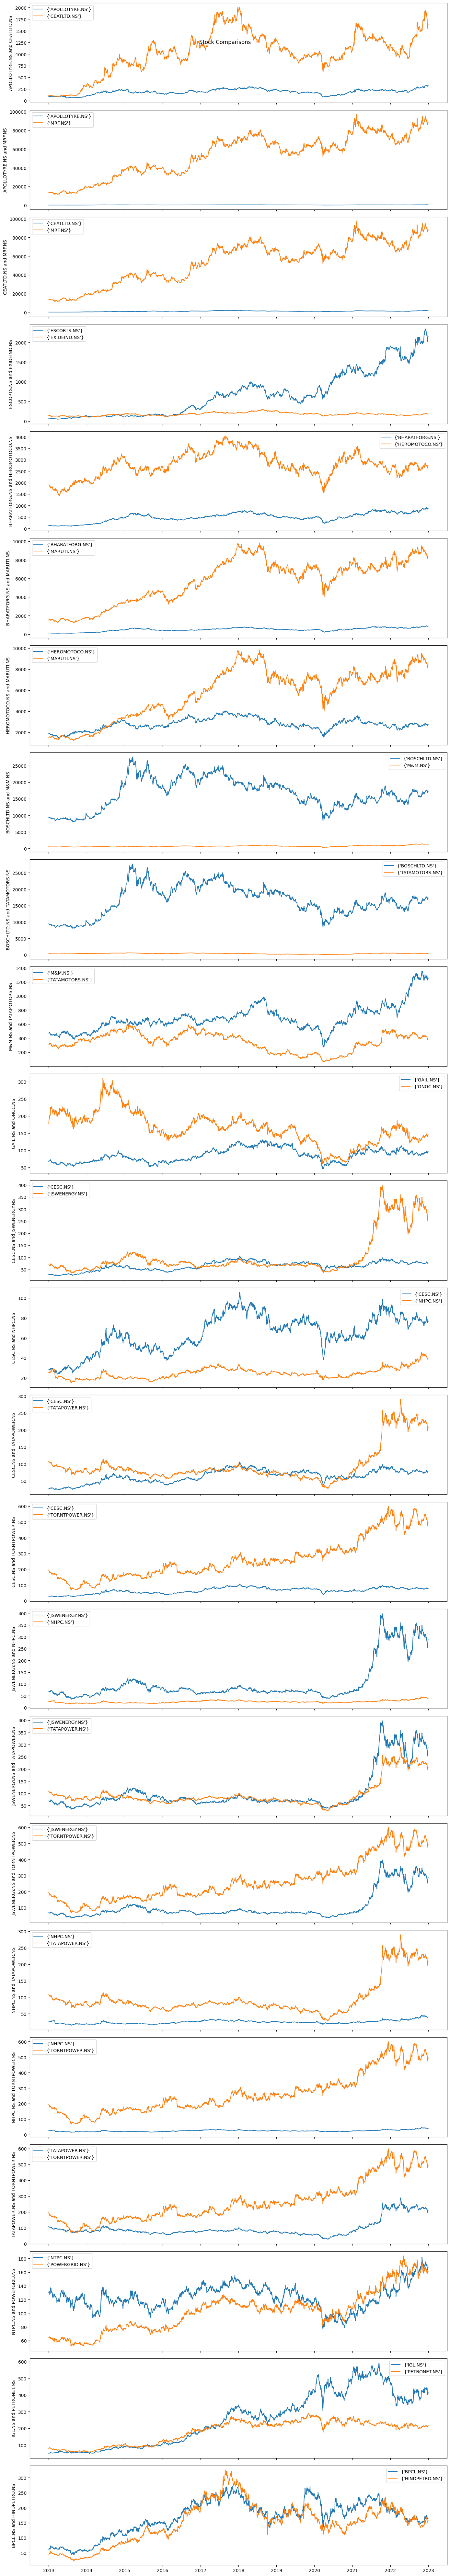

In [ ]:
components = [f'{pair[0]} and {pair[1]}' for pair in pairs]
fig, axes = plt.subplots(nrows=len(pairs),ncols=1,figsize=(14,80),sharex=True)

for i, ax in enumerate(axes):
    ax.plot(closing_prices[pairs[i][0]],label={pairs[i][0]})
    ax.plot(closing_prices[pairs[i][1]],label={pairs[i][1]})
    ax.legend()
    ax.set_ylabel(f'{components[i]}')

plt.suptitle('Stock Comparisons')
plt.tight_layout()
plt.show()

In [ ]:
coint_p = []
from statsmodels.tsa.stattools import coint
for pair in pairs:
  coint_p.append([coint(closing_prices[pair[0]],closing_prices[pair[1]],trend='c')[1],
                  coint(closing_prices[pair[0]],closing_prices[pair[1]],trend='ct')[1],
                  coint(closing_prices[pair[0]],closing_prices[pair[1]],trend='n')[1],
                  coint(closing_prices[pair[0]],closing_prices[pair[1]],trend='ctt')[1]
                  ])
coint_p

[[0.16347014878601873,
  0.4473693239193386,
  0.06945874817539781,
  0.3656090514707639],
 [0.5013920821702613,
  0.670156604303611,
  0.36048598796020015,
  0.7837506723888488],
 [0.34754777609117127,
  0.09904592567700965,
  0.16905178862243447,
  0.4361775659217427],
 [0.9939327390610545,
  0.6733657745315222,
  0.9828454170315402,
  0.3411715443417863],
 [0.8187686326806527,
  0.6412831798775901,
  0.59222410415725,
  0.5780303948199786],
 [0.4832918642692381,
  0.7313159844302155,
  0.20346834183041185,
  0.7472954065657558],
 [0.41572608935043587,
  0.25293033426154937,
  0.5044197619279437,
  0.44572091965496186],
 [0.6441862751518866,
  0.7902283984843441,
  0.7620807984825981,
  0.5053698320509026],
 [0.4466952789723303,
  0.7574544657727063,
  0.3522100980185297,
  0.38936185541927415],
 [0.9765859616178302,
  0.8161702755729985,
  0.8428443994042971,
  0.9025461697931147],
 [0.4091941123080617,
  0.7560271476845305,
  0.635680381257543,
  0.299118930538613],
 [0.33533248991

In [ ]:
exit_res = pd.DataFrame()
for c,pair in zip(coint_p,pairs):
  exit_res[f'{pair[0]}-{pair[1]}'] = c
exit_res = exit_res.T
exit_res

,0,1,2,3
APOLLOTYRE.NS-CEATLTD.NS,0.163470,0.447369,0.069459,0.365609
APOLLOTYRE.NS-MRF.NS,0.501392,0.670157,0.360486,0.783751
CEATLTD.NS-MRF.NS,0.347548,0.099046,0.169052,0.436178
ESCORTS.NS-EXIDEIND.NS,0.993933,0.673366,0.982845,0.341172
BHARATFORG.NS-HEROMOTOCO.NS,0.818769,0.641283,0.592224,0.578030
BHARATFORG.NS-MARUTI.NS,0.483292,0.731316,0.203468,0.747295
HEROMOTOCO.NS-MARUTI.NS,0.415726,0.252930,0.504420,0.445721
BOSCHLTD.NS-M&M.NS,0.644186,0.790228,0.762081,0.505370
BOSCHLTD.NS-TATAMOTORS.NS,0.446695,0.757454,0.352210,0.389362
M&M.NS-TATAMOTORS.NS,0.976586,0.816170,0.842844,0.902546


In [ ]:
mux = pd.MultiIndex.from_product([['Cointegration P-values'], ['c','ct','n','ctt']])
exit_res.columns = mux
exit_res

Cointegration P-values                      \
                                                 c        ct         n   
APOLLOTYRE.NS-CEATLTD.NS                  0.163470  0.447369  0.069459   
APOLLOTYRE.NS-MRF.NS                      0.501392  0.670157  0.360486   
CEATLTD.NS-MRF.NS                         0.347548  0.099046  0.169052   
ESCORTS.NS-EXIDEIND.NS                    0.993933  0.673366  0.982845   
BHARATFORG.NS-HEROMOTOCO.NS               0.818769  0.641283  0.592224   
BHARATFORG.NS-MARUTI.NS                   0.483292  0.731316  0.203468   
HEROMOTOCO.NS-MARUTI.NS                   0.415726  0.252930  0.504420   
BOSCHLTD.NS-M&M.NS                        0.644186  0.790228  0.762081   
BOSCHLTD.NS-TATAMOTORS.NS                 0.446695  0.757454  0.352210   
M&M.NS-TATAMOTORS.NS                      0.976586  0.816170  0.842844   
GAIL.NS-ONGC.NS                           0.409194  0.756027  0.635680   
CESC.NS-JSWENERGY.NS                      0.335332  0.693245  0.721288   
CESC.NS-NHPC.NS                           0.123043  0.530697  0.032001   
CESC.NS-TATAPOWER.NS                      0.411764  0.689897  0.597233   
CESC.NS-TORNTPOWER.NS                     0.385559  0.643627  0.512898   
JSWENERGY.NS-NHPC.NS                      0.393433  0.726768  0.499127   
JSWENERGY.NS-TATAPOWER.NS                 0.008854  0.016623  0.020633   
JSWENERGY.NS-TORNTPOWER.NS                0.381056  0.008106  0.219139   
NHPC.NS-TATAPOWER.NS                      0.350176  0.390369  0.559883   
NHPC.NS-TORNTPOWER.NS                     0.408169  0.671754  0.337369   
TATAPOWER.NS-TORNTPOWER.NS                0.716647  0.216959  0.337934   
NTPC.NS-POWERGRID.NS                      0.133052  0.002734  0.232925   
IGL.NS-PETRONET.NS                        0.701131  0.552941  0.504345   
BPCL.NS-HINDPETRO.NS                      0.079676  0.173809  0.115777   

                                       
                                  ctt  
APOLLOTYRE.NS-CEATLTD.NS     0.365609  
APOLLOTYRE.NS-MRF.NS         0.783751  
CEATLTD.NS-MRF.NS            0.436178  
ESCORTS.NS-EXIDEIND.NS       0.341172  
BHARATFORG.NS-HEROMOTOCO.NS  0.578030  
BHARATFORG.NS-MARUTI.NS      0.747295  
HEROMOTOCO.NS-MARUTI.NS      0.445721  
BOSCHLTD.NS-M&M.NS           0.505370  
BOSCHLTD.NS-TATAMOTORS.NS    0.389362  
M&M.NS-TATAMOTORS.NS         0.902546  
GAIL.NS-ONGC.NS              0.299119  
CESC.NS-JSWENERGY.NS         0.359061  
CESC.NS-NHPC.NS              0.300658  
CESC.NS-TATAPOWER.NS         0.528640  
CESC.NS-TORNTPOWER.NS        0.722644  
JSWENERGY.NS-NHPC.NS         0.482309  
JSWENERGY.NS-TATAPOWER.NS    0.045916  
JSWENERGY.NS-TORNTPOWER.NS   0.040493  
NHPC.NS-TATAPOWER.NS         0.474353  
NHPC.NS-TORNTPOWER.NS        0.868444  
TATAPOWER.NS-TORNTPOWER.NS   0.540192  
NTPC.NS-POWERGRID.NS         0.009171  
IGL.NS-PETRONET.NS           0.745591  
BPCL.NS-HINDPETRO.NS         0.075712

In [ ]:
exit_res.loc[:,'Coint Passed'] = ~ ((exit_res['Cointegration P-values'].loc[:,'c']>0.1) &
                                                 (exit_res['Cointegration P-values'].loc[:,'ct']>0.1) &
                                                 (exit_res['Cointegration P-values'].loc[:,'n']>0.1) &
                                                 (exit_res['Cointegration P-values'].loc[:,'ctt']>0.1))

In [ ]:
exit_res

Cointegration P-values                      \
                                                 c        ct         n   
APOLLOTYRE.NS-CEATLTD.NS                  0.163470  0.447369  0.069459   
APOLLOTYRE.NS-MRF.NS                      0.501392  0.670157  0.360486   
CEATLTD.NS-MRF.NS                         0.347548  0.099046  0.169052   
ESCORTS.NS-EXIDEIND.NS                    0.993933  0.673366  0.982845   
BHARATFORG.NS-HEROMOTOCO.NS               0.818769  0.641283  0.592224   
BHARATFORG.NS-MARUTI.NS                   0.483292  0.731316  0.203468   
HEROMOTOCO.NS-MARUTI.NS                   0.415726  0.252930  0.504420   
BOSCHLTD.NS-M&M.NS                        0.644186  0.790228  0.762081   
BOSCHLTD.NS-TATAMOTORS.NS                 0.446695  0.757454  0.352210   
M&M.NS-TATAMOTORS.NS                      0.976586  0.816170  0.842844   
GAIL.NS-ONGC.NS                           0.409194  0.756027  0.635680   
CESC.NS-JSWENERGY.NS                      0.335332  0.693245  0.721288   
CESC.NS-NHPC.NS                           0.123043  0.530697  0.032001   
CESC.NS-TATAPOWER.NS                      0.411764  0.689897  0.597233   
CESC.NS-TORNTPOWER.NS                     0.385559  0.643627  0.512898   
JSWENERGY.NS-NHPC.NS                      0.393433  0.726768  0.499127   
JSWENERGY.NS-TATAPOWER.NS                 0.008854  0.016623  0.020633   
JSWENERGY.NS-TORNTPOWER.NS                0.381056  0.008106  0.219139   
NHPC.NS-TATAPOWER.NS                      0.350176  0.390369  0.559883   
NHPC.NS-TORNTPOWER.NS                     0.408169  0.671754  0.337369   
TATAPOWER.NS-TORNTPOWER.NS                0.716647  0.216959  0.337934   
NTPC.NS-POWERGRID.NS                      0.133052  0.002734  0.232925   
IGL.NS-PETRONET.NS                        0.701131  0.552941  0.504345   
BPCL.NS-HINDPETRO.NS                      0.079676  0.173809  0.115777   

                                      Coint Passed  
                                  ctt               
APOLLOTYRE.NS-CEATLTD.NS     0.365609         True  
APOLLOTYRE.NS-MRF.NS         0.783751        False  
CEATLTD.NS-MRF.NS            0.436178         True  
ESCORTS.NS-EXIDEIND.NS       0.341172        False  
BHARATFORG.NS-HEROMOTOCO.NS  0.578030        False  
BHARATFORG.NS-MARUTI.NS      0.747295        False  
HEROMOTOCO.NS-MARUTI.NS      0.445721        False  
BOSCHLTD.NS-M&M.NS           0.505370        False  
BOSCHLTD.NS-TATAMOTORS.NS    0.389362        False  
M&M.NS-TATAMOTORS.NS         0.902546        False  
GAIL.NS-ONGC.NS              0.299119        False  
CESC.NS-JSWENERGY.NS         0.359061        False  
CESC.NS-NHPC.NS              0.300658         True  
CESC.NS-TATAPOWER.NS         0.528640        False  
CESC.NS-TORNTPOWER.NS        0.722644        False  
JSWENERGY.NS-NHPC.NS         0.482309        False  
JSWENERGY.NS-TATAPOWER.NS    0.045916         True  
JSWENERGY.NS-TORNTPOWER.NS   0.040493         True  
NHPC.NS-TATAPOWER.NS         0.474353        False  
NHPC.NS-TORNTPOWER.NS        0.868444        False  
TATAPOWER.NS-TORNTPOWER.NS   0.540192        False  
NTPC.NS-POWERGRID.NS         0.009171         True  
IGL.NS-PETRONET.NS           0.745591        False  
BPCL.NS-HINDPETRO.NS         0.075712         True

In [ ]:
!pip install hurst

In [ ]:
exit_res['Coint Passed']

APOLLOTYRE.NS-CEATLTD.NS        True
APOLLOTYRE.NS-MRF.NS           False
CEATLTD.NS-MRF.NS               True
ESCORTS.NS-EXIDEIND.NS         False
BHARATFORG.NS-HEROMOTOCO.NS    False
BHARATFORG.NS-MARUTI.NS        False
HEROMOTOCO.NS-MARUTI.NS        False
BOSCHLTD.NS-M&M.NS             False
BOSCHLTD.NS-TATAMOTORS.NS      False
M&M.NS-TATAMOTORS.NS           False
GAIL.NS-ONGC.NS                False
CESC.NS-JSWENERGY.NS           False
CESC.NS-NHPC.NS                 True
CESC.NS-TATAPOWER.NS           False
CESC.NS-TORNTPOWER.NS          False
JSWENERGY.NS-NHPC.NS           False
JSWENERGY.NS-TATAPOWER.NS       True
JSWENERGY.NS-TORNTPOWER.NS      True
NHPC.NS-TATAPOWER.NS           False
NHPC.NS-TORNTPOWER.NS          False
TATAPOWER.NS-TORNTPOWER.NS     False
NTPC.NS-POWERGRID.NS            True
IGL.NS-PETRONET.NS             False
BPCL.NS-HINDPETRO.NS            True
Name: Coint Passed, dtype: bool

In [ ]:
from hurst import compute_Hc, random_walk
hurst = [np.inf]*len(exit_res)
for i in range(len(pairs)):
  if exit_res['Coint Passed'][i] == True:
    hurst[i] = compute_Hc(closing_prices[pairs[i][0]]-closing_prices[pairs[i][1]])[0]

exit_res['Hurst exponent'] = hurst


In [ ]:
from hurst import compute_Hc, random_walk
scaled_hurst = [np.inf]*len(exit_res)
basic_hedge_ratio = [0]*len(exit_res)
for i in range(len(pairs)):
  if exit_res['Coint Passed'][i] == True:
    scaled_hurst[i] = compute_Hc((closing_prices[pairs[i][1]].mean())*(closing_prices[pairs[i][0]])-(closing_prices[pairs[i][0]].mean())*(closing_prices[pairs[i][1]]))[0]
    basic_hedge_ratio[i] = (closing_prices[pairs[i][0]].mean())/(closing_prices[pairs[i][1]].mean())

exit_res['Basic Hedge Ratio'] =basic_hedge_ratio
exit_res['Scaled Hurst Exponent'] = scaled_hurst
exit_res

Cointegration P-values                      \
                                                 c        ct         n   
APOLLOTYRE.NS-CEATLTD.NS                  0.163470  0.447369  0.069459   
APOLLOTYRE.NS-MRF.NS                      0.501392  0.670157  0.360486   
CEATLTD.NS-MRF.NS                         0.347548  0.099046  0.169052   
ESCORTS.NS-EXIDEIND.NS                    0.993933  0.673366  0.982845   
BHARATFORG.NS-HEROMOTOCO.NS               0.818769  0.641283  0.592224   
BHARATFORG.NS-MARUTI.NS                   0.483292  0.731316  0.203468   
HEROMOTOCO.NS-MARUTI.NS                   0.415726  0.252930  0.504420   
BOSCHLTD.NS-M&M.NS                        0.644186  0.790228  0.762081   
BOSCHLTD.NS-TATAMOTORS.NS                 0.446695  0.757454  0.352210   
M&M.NS-TATAMOTORS.NS                      0.976586  0.816170  0.842844   
GAIL.NS-ONGC.NS                           0.409194  0.756027  0.635680   
CESC.NS-JSWENERGY.NS                      0.335332  0.693245  0.721288   
CESC.NS-NHPC.NS                           0.123043  0.530697  0.032001   
CESC.NS-TATAPOWER.NS                      0.411764  0.689897  0.597233   
CESC.NS-TORNTPOWER.NS                     0.385559  0.643627  0.512898   
JSWENERGY.NS-NHPC.NS                      0.393433  0.726768  0.499127   
JSWENERGY.NS-TATAPOWER.NS                 0.008854  0.016623  0.020633   
JSWENERGY.NS-TORNTPOWER.NS                0.381056  0.008106  0.219139   
NHPC.NS-TATAPOWER.NS                      0.350176  0.390369  0.559883   
NHPC.NS-TORNTPOWER.NS                     0.408169  0.671754  0.337369   
TATAPOWER.NS-TORNTPOWER.NS                0.716647  0.216959  0.337934   
NTPC.NS-POWERGRID.NS                      0.133052  0.002734  0.232925   
IGL.NS-PETRONET.NS                        0.701131  0.552941  0.504345   
BPCL.NS-HINDPETRO.NS                      0.079676  0.173809  0.115777   

                                      Coint Passed Hurst exponent  \
                                  ctt                               
APOLLOTYRE.NS-CEATLTD.NS     0.365609         True       0.545269   
APOLLOTYRE.NS-MRF.NS         0.783751        False            inf   
CEATLTD.NS-MRF.NS            0.436178         True       0.570671   
ESCORTS.NS-EXIDEIND.NS       0.341172        False            inf   
BHARATFORG.NS-HEROMOTOCO.NS  0.578030        False            inf   
BHARATFORG.NS-MARUTI.NS      0.747295        False            inf   
HEROMOTOCO.NS-MARUTI.NS      0.445721        False            inf   
BOSCHLTD.NS-M&M.NS           0.505370        False            inf   
BOSCHLTD.NS-TATAMOTORS.NS    0.389362        False            inf   
M&M.NS-TATAMOTORS.NS         0.902546        False            inf   
GAIL.NS-ONGC.NS              0.299119        False            inf   
CESC.NS-JSWENERGY.NS         0.359061        False            inf   
CESC.NS-NHPC.NS              0.300658         True       0.523074   
CESC.NS-TATAPOWER.NS         0.528640        False            inf   
CESC.NS-TORNTPOWER.NS        0.722644        False            inf   
JSWENERGY.NS-NHPC.NS         0.482309        False            inf   
JSWENERGY.NS-TATAPOWER.NS    0.045916         True       0.519903   
JSWENERGY.NS-TORNTPOWER.NS   0.040493         True       0.462448   
NHPC.NS-TATAPOWER.NS         0.474353        False            inf   
NHPC.NS-TORNTPOWER.NS        0.868444        False            inf   
TATAPOWER.NS-TORNTPOWER.NS   0.540192        False            inf   
NTPC.NS-POWERGRID.NS         0.009171         True       0.474892   
IGL.NS-PETRONET.NS           0.745591        False            inf   
BPCL.NS-HINDPETRO.NS         0.075712         True       0.483747   

                            Basic Hedge Ratio Scaled Hurst Exponent  
                                                                     
APOLLOTYRE.NS-CEATLTD.NS             0.183090              0.482694  
APOLLOTYRE.NS-MRF.NS                 0.000000                   inf  
CEATLTD.NS-MRF.NS           

The Hurst Exponent tells that all the cointegrated pairs are mean reverting statistically.

## Half Life

$$
t_{1/2} = -\frac{\ln(2)}{\ln(\lambda)}
$$

### Using Arithmetic Ornstein-Uhlenbeck:

$$
dx = \eta(x-m)dt + \sigma dz
\\  
z \sim N(0,dt)
\\
E[dx] = \eta(x-m)dt
\\
\frac{dx}{(x-m)} = \eta dx
\\
\ln(x-m)_{x0}^{x1} = \eta \Delta t
\\
\text{for } \Delta t \text{= half-Life: } \textbf{H} \text{ ; } \frac{x_1-m}{x_0-m}  = 0.5
\\
ln(\frac{x_1-m}{x_0-m}) = \eta \textbf{H} = ln(2)
\\
\textbf{H} = \frac{ln(2)}{\eta}
$$

### Using AR process as model:
$$
\textbf{H} = -\frac{ln(2)}{ln(\lambda)}
\\
\text{where: } y_t = c + \lambda y_{t-1} + \epsilon_t
$$

In [ ]:
!pip install ouparams

In [ ]:
from statsmodels.tsa.api import AutoReg
import math
from ouparams import ouparams

ar1_half_life = [0]*len(exit_res)
OU_half_Life = [0]*len(exit_res)
for i in range(len(pairs)):
  if exit_res['Coint Passed'][i] == True:
    ar_model = AutoReg(closing_prices[pairs[i][0]]-closing_prices[pairs[i][1]], lags=1)
    ar_results = ar_model.fit()
    ar1_half_life[i] = -math.log(2,2.718)/math.log(ar_results.params[1],2.718)
    eta = ouparams.find(closing_prices[pairs[i][0]]-closing_prices[pairs[i][1]])[2]
    OU_half_Life[i] = math.log(2,2.718)/eta

exit_res['AR1 Half-Life'] = ar1_half_life
exit_res['Ornstein-Uhlenbeck Half-Life'] = OU_half_Life

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
exit_res

Cointegration P-values                      \
                                                 c        ct         n   
APOLLOTYRE.NS-CEATLTD.NS                  0.163470  0.447369  0.069459   
APOLLOTYRE.NS-MRF.NS                      0.501392  0.670157  0.360486   
CEATLTD.NS-MRF.NS                         0.347548  0.099046  0.169052   
ESCORTS.NS-EXIDEIND.NS                    0.993933  0.673366  0.982845   
BHARATFORG.NS-HEROMOTOCO.NS               0.818769  0.641283  0.592224   
BHARATFORG.NS-MARUTI.NS                   0.483292  0.731316  0.203468   
HEROMOTOCO.NS-MARUTI.NS                   0.415726  0.252930  0.504420   
BOSCHLTD.NS-M&M.NS                        0.644186  0.790228  0.762081   
BOSCHLTD.NS-TATAMOTORS.NS                 0.446695  0.757454  0.352210   
M&M.NS-TATAMOTORS.NS                      0.976586  0.816170  0.842844   
GAIL.NS-ONGC.NS                           0.409194  0.756027  0.635680   
CESC.NS-JSWENERGY.NS                      0.335332  0.693245  0.721288   
CESC.NS-NHPC.NS                           0.123043  0.530697  0.032001   
CESC.NS-TATAPOWER.NS                      0.411764  0.689897  0.597233   
CESC.NS-TORNTPOWER.NS                     0.385559  0.643627  0.512898   
JSWENERGY.NS-NHPC.NS                      0.393433  0.726768  0.499127   
JSWENERGY.NS-TATAPOWER.NS                 0.008854  0.016623  0.020633   
JSWENERGY.NS-TORNTPOWER.NS                0.381056  0.008106  0.219139   
NHPC.NS-TATAPOWER.NS                      0.350176  0.390369  0.559883   
NHPC.NS-TORNTPOWER.NS                     0.408169  0.671754  0.337369   
TATAPOWER.NS-TORNTPOWER.NS                0.716647  0.216959  0.337934   
NTPC.NS-POWERGRID.NS                      0.133052  0.002734  0.232925   
IGL.NS-PETRONET.NS                        0.701131  0.552941  0.504345   
BPCL.NS-HINDPETRO.NS                      0.079676  0.173809  0.115777   

                                      Coint Passed Hurst exponent  \
                                  ctt                               
APOLLOTYRE.NS-CEATLTD.NS     0.365609         True       0.545269   
APOLLOTYRE.NS-MRF.NS         0.783751        False            inf   
CEATLTD.NS-MRF.NS            0.436178         True       0.570671   
ESCORTS.NS-EXIDEIND.NS       0.341172        False            inf   
BHARATFORG.NS-HEROMOTOCO.NS  0.578030        False            inf   
BHARATFORG.NS-MARUTI.NS      0.747295        False            inf   
HEROMOTOCO.NS-MARUTI.NS      0.445721        False            inf   
BOSCHLTD.NS-M&M.NS           0.505370        False            inf   
BOSCHLTD.NS-TATAMOTORS.NS    0.389362        False            inf   
M&M.NS-TATAMOTORS.NS         0.902546        False            inf   
GAIL.NS-ONGC.NS              0.299119        False            inf   
CESC.NS-JSWENERGY.NS         0.359061        False            inf   
CESC.NS-NHPC.NS              0.300658         True       0.523074   
CESC.NS-TATAPOWER.NS         0.528640        False            inf   
CESC.NS-TORNTPOWER.NS        0.722644        False            inf   
JSWENERGY.NS-NHPC.NS         0.482309        False            inf   
JSWENERGY.NS-TATAPOWER.NS    0.045916         True       0.519903   
JSWENERGY.NS-TORNTPOWER.NS   0.040493         True       0.462448   
NHPC.NS-TATAPOWER.NS         0.474353        False            inf   
NHPC.NS-TORNTPOWER.NS        0.868444        False            inf   
TATAPOWER.NS-TORNTPOWER.NS   0.540192        False            inf   
NTPC.NS-POWERGRID.NS         0.009171         True       0.474892   
IGL.NS-PETRONET.NS           0.745591        False            inf   
BPCL.NS-HINDPETRO.NS         0.075712         True       0.483747   

                            Basic Hedge Ratio Scaled Hurst Exponent  \
                                                                      
APOLLOTYRE.NS-CEATLTD.NS             0.183090              0.482694   
APOLLOTYRE.NS-MRF.NS                 0.000000                   inf   
CEATLTD.NS-MRF.NS       

In [ ]:
len(np.where(np.diff(np.sign(closing_prices[pairs[0][1]]-closing_prices[pairs[0][1]].mean())))[0])

41

In [ ]:
def calculate_mean_crossover_frequency(spread):
    """
    Calculate the average mean crossover frequency of the spread.

    Parameters:
    spread (array-like): The spread between two stocks.

    Returns:
    float: The average mean crossover frequency.
    """
    dpy = 252
    num_crossings = []

    for i in range(0,len(spread),dpy):
      tempmean = np.mean(spread[i:dpy])
      tempspread = spread[i:dpy]
      num_crossings.append(len(np.where(np.diff(np.sign(tempspread - np.mean(spread))))[0]))

    return num_crossings

calculate_mean_crossover_frequency(closing_prices[pairs[11][1]]-closing_prices[pairs[11][1]])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

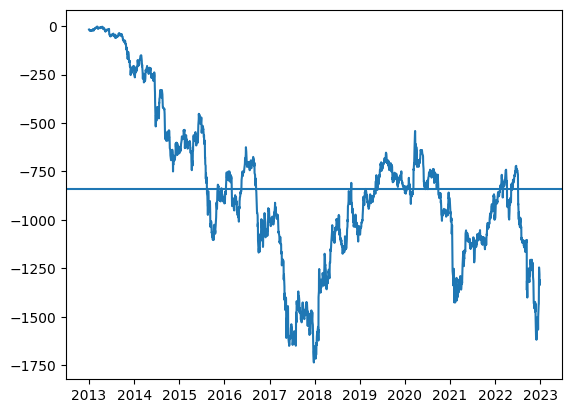

In [ ]:
plt.plot(closing_prices[pairs[0][0]]-closing_prices[pairs[0][1]])
plt.axhline((closing_prices[pairs[0][0]]-closing_prices[pairs[0][1]]).mean())

#Stratergy Execution



---



In [ ]:
start = "2023-01-01"
end = "2024-04-30"

In [ ]:
testing_data = yf.download([pairs[21][0],pairs[21][1]], start=start, end=end)
closing_prices = testing_data['Close']
closing_prices

[*********************100%%**********************]  2 of 2 completed


Ticker,NTPC.NS,POWERGRID.NS
Date,,
2023-01-02,168.000000,161.287506
2023-01-03,167.600006,161.699997
2023-01-04,166.600006,158.287506
2023-01-05,169.899994,156.600006
2023-01-06,169.000000,156.074997
...,...,...
2024-04-23,347.149994,285.350006
2024-04-24,351.649994,290.399994
2024-04-25,359.200012,293.299988


In [ ]:
window = 7

strategy = pd.DataFrame({f'closing_price_{pairs[21][0]}' : closing_prices[pairs[21][0]],
                         f'closing_price_{pairs[21][1]}' : closing_prices[pairs[21][1]]})
strategy['Spread'] = strategy[f'closing_price_{pairs[21][0]}'] - strategy[f'closing_price_{pairs[21][1]}']
strategy['Mean'] = strategy['Spread'].rolling(window=window).mean()
strategy['Std'] = strategy['Spread'].rolling(window=window).std()
strategy['Z-Score'] = (strategy['Spread'] - strategy['Mean']) / strategy['Std']

strategy

,closing_price_NTPC.NS,closing_price_POWERGRID.NS,Spread,Mean,Std,Z-Score
Date,,,,,,
2023-01-02,168.000000,161.287506,6.712494,NaN,NaN,NaN
2023-01-03,167.600006,161.699997,5.900009,NaN,NaN,NaN
2023-01-04,166.600006,158.287506,8.312500,NaN,NaN,NaN
2023-01-05,169.899994,156.600006,13.299988,NaN,NaN,NaN
2023-01-06,169.000000,156.074997,12.925003,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-04-23,347.149994,285.350006,61.799988,74.228568,11.899649,-1.044449
2024-04-24,351.649994,290.399994,61.250000,70.621425,11.375300,-0.823840
2024-04-25,359.200012,293.299988,65.900024,67.592856,8.783764,-0.192723


In [ ]:
entry_threshold = 1
exit_threshold = 0
strategy['Position'] = 0

strategy.loc[strategy['Z-Score'] > entry_threshold, 'Position'] = -1      # Short
strategy.loc[strategy['Z-Score'] < -entry_threshold, 'Position'] = 1      # Long
strategy.loc[strategy['Z-Score'].abs() < exit_threshold, 'Position'] = 0  # exit

strategy

,closing_price_NTPC.NS,closing_price_POWERGRID.NS,Spread,Mean,Std,Z-Score,Position,Strategy_Return,NTPC.NS Return,POWERGRID.NS Return
Date,,,,,,,,,,
2023-01-02,168.000000,161.287506,6.712494,NaN,NaN,NaN,0,NaN,NaN,NaN
2023-01-03,167.600006,161.699997,5.900009,NaN,NaN,NaN,0,-0.000000,-0.002381,0.002557
2023-01-04,166.600006,158.287506,8.312500,NaN,NaN,NaN,0,0.000000,-0.005967,-0.021104
2023-01-05,169.899994,156.600006,13.299988,NaN,NaN,NaN,0,0.000000,0.019808,-0.010661
2023-01-06,169.000000,156.074997,12.925003,NaN,NaN,NaN,0,-0.000000,-0.005297,-0.003353
...,...,...,...,...,...,...,...,...,...,...
2024-04-23,347.149994,285.350006,61.799988,74.228568,11.899649,-1.044449,1,0.006401,0.012394,0.005993
2024-04-24,351.649994,290.399994,61.250000,70.621425,11.375300,-0.823840,0,-0.000000,0.012963,0.017698
2024-04-25,359.200012,293.299988,65.900024,67.592856,8.783764,-0.192723,0,0.000000,0.021470,0.009986


In [ ]:
np.sum(strategy.loc[strategy['Z-Score'] < -entry_threshold, 'Position'])

63

In [ ]:
testing_data = yf.download([pairs[21][0],pairs[21][1]], start=start, end=end)
closingprices = testing_data['Close']
portfolio_strat = []
portfolio_strat_val=100
portfolio_st1 = []
portfolio_st1_val = 100
portfolio_st2 = []
portfolio_st2_val = 100
strategy[f'closing_price_{pairs[21][0]}'] = closingprices[pairs[21][0]]
strategy[f'closing_price_{pairs[21][1]}'] = closingprices[pairs[21][1]]
# strategy['Strategy_Return'] = 1
# for i in range(1,len(strategy)):
#   if(strategy['Position'][i]==0):
#     strategy['Strategy_Return'][i] = strategy['Strategy_Return'][i-1]
#   else:
#     strategy['']

# strategy['Strategy_Return'] = 1
# strategy['Strategy_Return'] = (strategy['Position'].shift(1))* (strategy[f'closing_price_{pairs[21][0]}'].pct_change() - strategy[f'closing_price_{pairs[21][1]}'].pct_change())
# strategy['Strategy_Return'][1:] = np.where((strategy['Position'][1:].shift(1))==0,strategy['Strategy_Return'][1:].shift(1) ,(strategy['Position'][1:].shift(1))* (strategy[f'closing_price_{pairs[23][0]}'][1:].pct_change() - strategy[f'closing_price_{pairs[23][1]}'][1:].pct_change()))
strategy[f'{pairs[21][0]} Return'] = strategy[f'closing_price_{pairs[21][0]}'].pct_change()
strategy[f'{pairs[21][1]} Return'] = strategy[f'closing_price_{pairs[21][1]}'].pct_change()
for i in range(1,len(strategy)):
  # portfolio_strat_val = (1+strategy.iloc[i,:]['Strategy_Return']).cumprod()*portfolio_strat_val
  # portfolio_strat.append(portfolio_strat_val)
  portfolio_st1_val = (1+strategy.iloc[i,:][f'{pairs[21][0]} Return']).cumprod()*portfolio_st1_val
  portfolio_st1.append(portfolio_st1_val)
  portfolio_st2_val = (1+strategy.iloc[i,:][f'{pairs[21][1]} Return']).cumprod()*portfolio_st2_val
  portfolio_st2.append(portfolio_st2_val)

print(f'{pairs[23][0]} Value:{portfolio_st1_val}')
print(f'{pairs[23][1]} Value:{portfolio_st2_val}')
# print(f'Pair Value:{portfolio_strat_val}')

[*********************100%%**********************]  2 of 2 completed

BPCL.NS Value:[216.07142857]
HINDPETRO.NS Value:[182.09718738]


In [ ]:
def trade(S1, S2, window1, window2,hedge_ratio=[1]):

    ratios = S1/S2
    if len(hedge_ratio)==1:
      hedge_ratio = ratios
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std

    money = 0
    countS1 = 0
    countS2 = 0
    portfolio = []
    for i in range(len(ratios)):
        if zscore[i] < -1:
            money += S1[i] - S2[i] * hedge_ratio[i]
            countS1 -= 1
            countS2 += ratios[i]
        elif zscore[i] > 1:
            money -= S1[i] - S2[i] * hedge_ratio[i]
            countS1 += 1
            countS2 -= ratios[i]
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
        portfolio.append(money)


    return money,portfolio

In [ ]:
finalval, portfolio = trade(closing_prices[pairs[21][0]],closing_prices[pairs[21][1]],30,5)
finalval

456.43016762244036

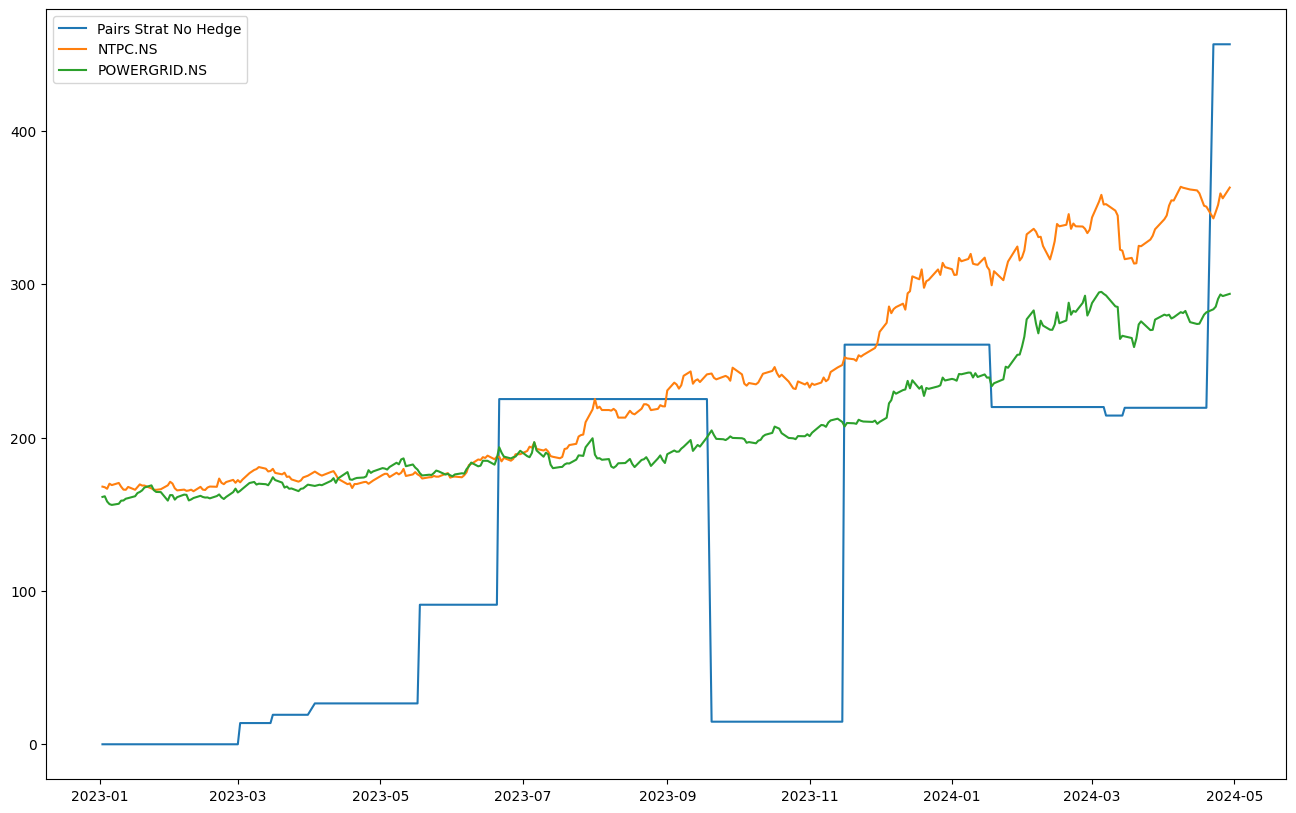

In [ ]:
portfolio_df = pd.DataFrame({'portfolio':portfolio})
portfolio_df.index = closing_prices.index
fig,ax = plt.subplots(figsize=(16,10))
ax.plot(portfolio_df,label="Pairs Strat No Hedge")
ax.plot(closing_prices[pairs[21][0]], label =f'{pairs[21][0]}' )
ax.plot(closing_prices[pairs[21][1]], label = f'{pairs[21][1]}')
ax.legend()
plt.show()

In [ ]:
basic_hedge_ratio = (strategy[f'closing_price_{pairs[21][0]}']/strategy[f'closing_price_{pairs[21][1]}']).shift(1)
basic_hedge_ratio

Date
2023-01-02         NaN
2023-01-03    1.041618
2023-01-04    1.036487
2023-01-05    1.052515
2023-01-06    1.084930
                ...   
2024-04-23    1.208884
2024-04-24    1.216576
2024-04-25    1.210916
2024-04-26    1.224685
2024-04-29    1.218135
Length: 324, dtype: float64

In [ ]:
finalval, portfolio = trade(closing_prices[pairs[21][0]],closing_prices[pairs[21][1]],30,5,basic_hedge_ratio)
finalval

516.7438309536356

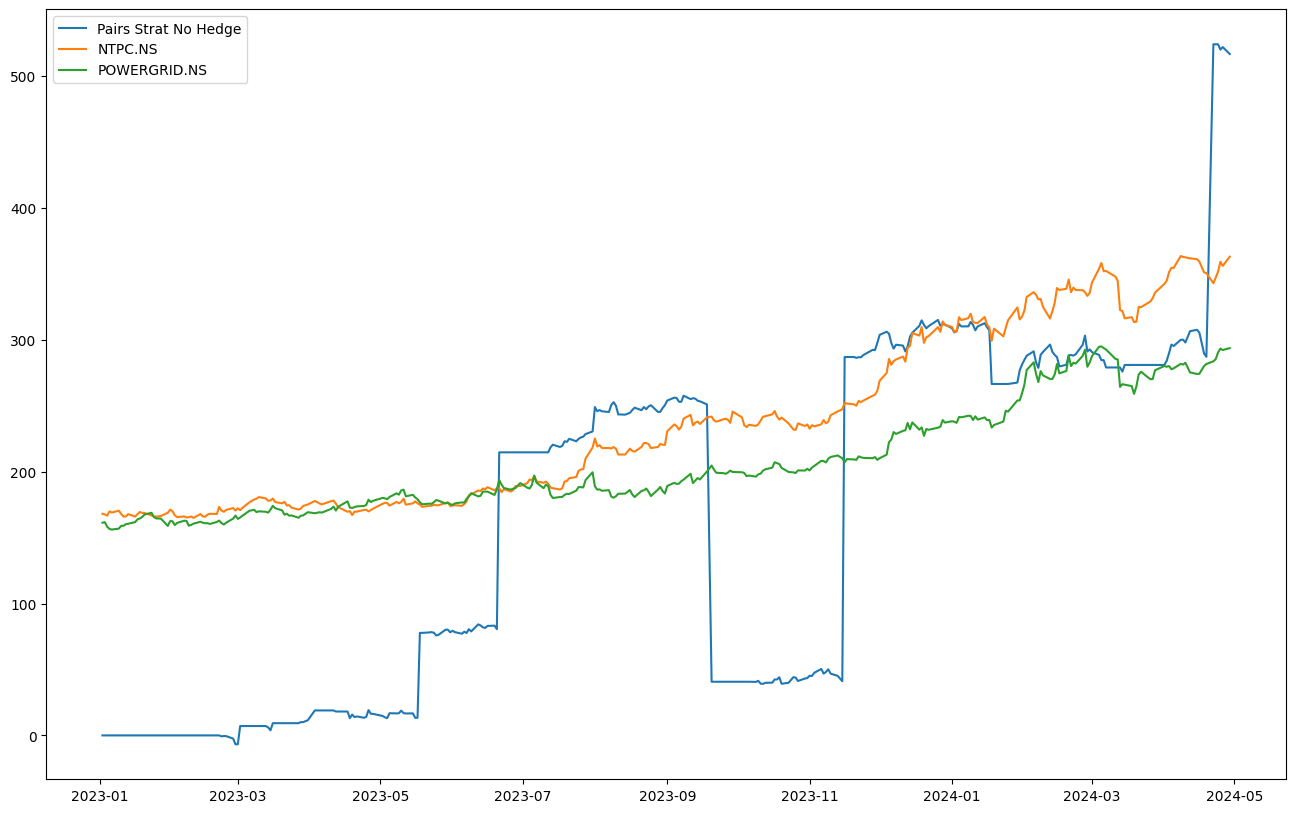

In [ ]:
portfolio_df = pd.DataFrame({'portfolio':portfolio})
portfolio_df.index = closing_prices.index
fig,ax = plt.subplots(figsize=(16,10))
ax.plot(portfolio_df,label="Pairs Strat No Hedge")
ax.plot(closing_prices[pairs[21][0]], label =f'{pairs[21][0]}' )
ax.plot(closing_prices[pairs[21][1]], label = f'{pairs[21][1]}')
ax.legend()
plt.show()

In [ ]:
portfolio_strat_bh = []
portfolio_strat_val_bh=100
strategy['Basic_Hedge_Strategy_Return'] = np.where((strategy['Position'].shift(1))==0.5, (strategy['Position'].shift(1))*basic_hedge_ratio*(strategy[f'closing_price_{pairs[23][0]}'].pct_change() + strategy[f'closing_price_{pairs[23][1]}'].pct_change()),(strategy['Position'].shift(1))* (strategy[f'closing_price_{pairs[23][0]}'].pct_change() - basic_hedge_ratio*strategy[f'closing_price_{pairs[23][1]}'].pct_change()))

for i in range(1,len(strategy)):
  portfolio_strat_val_bh = (1+strategy.iloc[i,:]['Basic_Hedge_Strategy_Return']).cumprod()*portfolio_strat_val_bh
  portfolio_strat_bh.append(portfolio_strat_val_bh)


print(f'{pairs[23][0]} Value:{portfolio_st1_val}')
print(f'{pairs[23][1]} Value:{portfolio_st2_val}')
print(f'Basic Hedge Pair Value:{portfolio_strat_val_bh}')

IGL.NS Value:[110.26008098]
PETRONET.NS Value:[140.81255374]
Basic Hedge Pair Value:[183.57831156]


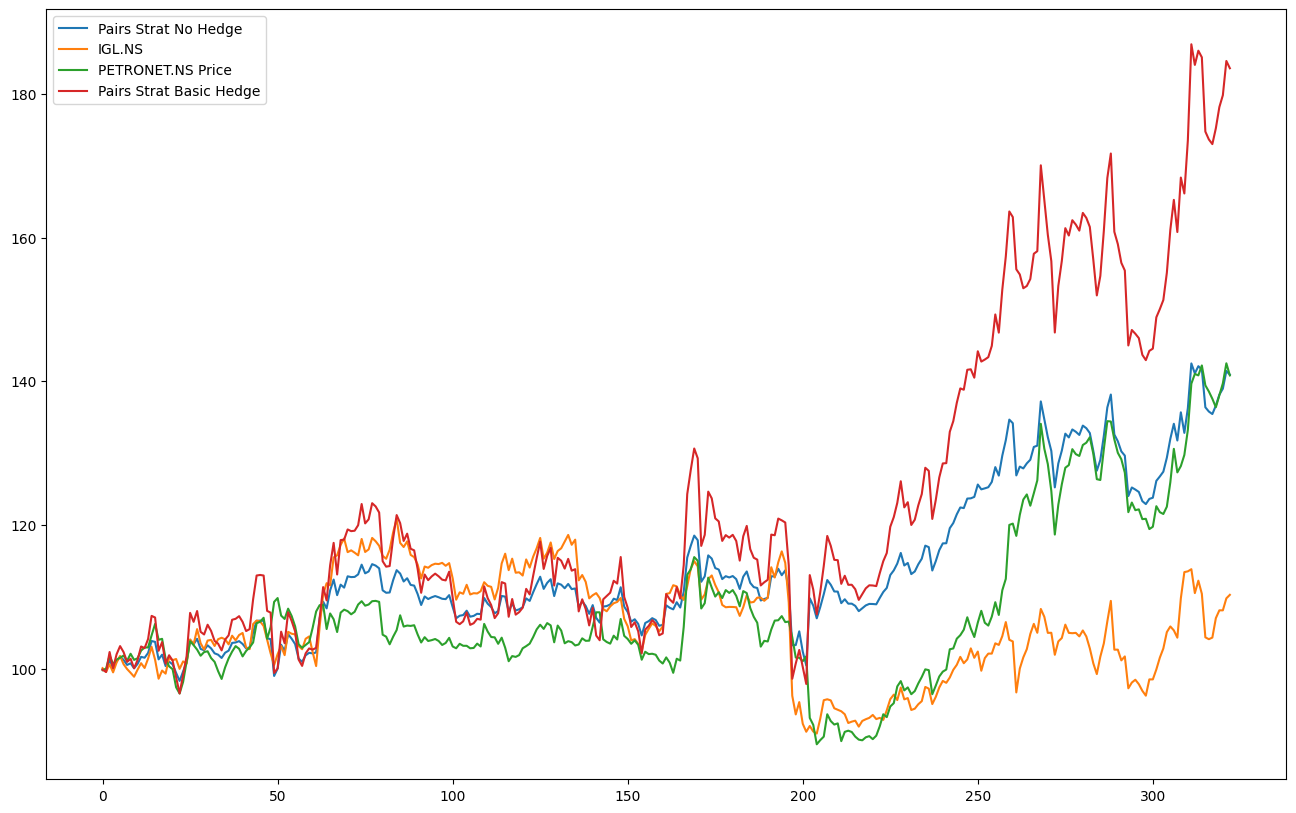

In [ ]:
fig,ax = plt.subplots(figsize=(16,10))
ax.plot(portfolio_strat,label="Pairs Strat No Hedge")
ax.plot(portfolio_st1, label =f'{pairs[23][0]}' )
ax.plot(portfolio_st2, label = f'{pairs[23][1]} Price')
ax.plot(portfolio_strat_bh,label="Pairs Strat Basic Hedge")
ax.legend()
plt.show()

Annualized Sharpe: dividing the annualized mean monthly excess return by the annualized monthly standard deviation of excess return.

In [ ]:
j=0
t=0
mean_ex_ret = []
mean_ex_st1 = []
ann_shapre_st1 = []
ann_shapre_strat_bh = []
for i in range(len(portfolio_strat_bh)):
  if i%24==0:
    mean_ex_ret.append(pd.DataFrame(portfolio_strat_bh).loc[j:i+1,:].pct_change().mean())
    mean_ex_st1.append(pd.DataFrame(portfolio_st1).loc[j:i+1,:].pct_change().mean())
    j=i+1
  if i%252==0:
    ann_shapre_strat_bh.append(pd.DataFrame(mean_ex_ret[t:t+12]).mean()/pd.DataFrame(mean_ex_ret[t:t+12]).std())
    ann_shapre_st1.append(pd.DataFrame(mean_ex_st1[t:t+12]).mean()/pd.DataFrame(mean_ex_st1[t:t+12]).std())

print(ann_sharpe_strat_bh)
print(ann_sharpe_st1)


AttributeError: 'list' object has no attribute 'mean'

In [ ]:
mean_monthly_ex_ret_bh_strat =(pd.DataFrame(portfolio_strat_bh).pct_change().rolling(24).mean() - pd.DataFrame(portfolio_st1).pct_change().rolling(24).mean()).rolling(252).mean()
std_monthly_ex_ret_bh_strat =(pd.DataFrame(portfolio_strat_bh).pct_change().rolling(24).mean() - pd.DataFrame(portfolio_st1).pct_change().rolling(24).mean()).rolling(252).std()
mean_monthly_ex_ret_bh_strat/std_monthly_ex_ret_bh_strat

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
318,0.701897
319,0.713036
320,0.723904
321,0.736199


## VECM Based Min Variance Dynamic Hedge